In [8]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score # Import train_test_split function
from sklearn import metrics 
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot  as plt

Load Dataset in

In [9]:
col_names = ["id",	"age",	"sex",	"region",	"income",	"married",	"children",	"car",	"save_act",	"current_act",	"mortgage",	"pep"]
df = pd.read_excel('bank.xlsx', header=None, names=col_names, skiprows=[0])

df.head()

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,ID12101,48,FEMALE,INNER_CITY,17546.0,NO,1,NO,NO,NO,NO,YES
1,ID12102,40,MALE,TOWN,30085.1,YES,3,YES,NO,YES,YES,NO
2,ID12103,51,FEMALE,INNER_CITY,16575.4,YES,0,YES,YES,YES,NO,NO
3,ID12104,23,FEMALE,TOWN,20375.4,YES,3,NO,NO,YES,NO,NO
4,ID12105,57,FEMALE,RURAL,50576.3,YES,0,NO,YES,NO,NO,NO


In [10]:
# Creating a instance of label Encoder.
cols = ["sex", "married", "car", "save_act", "current_act", "mortgage", "pep"]
df = pd.get_dummies(df, columns=cols, drop_first=True)
# Convert the non-binary categorical data into numerical data using label encoder
label_encoder = LabelEncoder()
df["region"] = label_encoder.fit_transform(df["region"])

In [11]:
df.head()

,id,age,region,income,children,sex_MALE,married_YES,car_YES,save_act_YES,current_act_YES,mortgage_YES,pep_YES
0,ID12101,48,0,17546.0,1,0,0,0,0,0,0,1
1,ID12102,40,3,30085.1,3,1,1,1,0,1,1,0
2,ID12103,51,0,16575.4,0,0,1,1,1,1,0,0
3,ID12104,23,3,20375.4,3,0,1,0,0,1,0,0
4,ID12105,57,1,50576.3,0,0,1,0,1,0,0,0


Split the dataset to train for model

In [12]:
#split dataset in features and target variable
feature_cols = ["age", "children", "sex_MALE", "income", "married_YES", "car_YES", "save_act_YES", "current_act_YES", "mortgage_YES"]
X = df[feature_cols] # Features
y = df.pep_YES # Target variable

In [13]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

Logistic Regression 

In [14]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [15]:
# Checking the accuracy score 
# The accuracy can still be higher, so we will hyperparameter tuning it using gridsearch & randomsearch this time
logreg.score(X_train, y_train)

0.6571428571428571

GridSearch to hyperparm tune the linear logistic model 

In [18]:
from sklearn.model_selection import GridSearchCV
import time

In [27]:
dual=[True,False]
max_iter=[100,110,120,130,140]
C = [1.0,1.5,2.0,2.5]
param_grid = dict(dual=dual,max_iter=max_iter,C=C)


In [28]:
lr = LogisticRegression(penalty='l2')
grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv = 3, scoring='accuracy')

start_time = time.time()
grid_result = grid.fit(X, y)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')


Best: 0.598333 using {'C': 2.5, 'dual': False, 'max_iter': 100}
Execution time: 0.6282835006713867 ms


C:\Users\mrput\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mrput\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mrput\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-pac

In [29]:
from sklearn.model_selection import RandomizedSearchCV

random = RandomizedSearchCV(estimator=lr, param_distributions=param_grid, cv = 3, scoring='accuracy')

start_time = time.time()
random_result = random.fit(X, y)
# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')


Best: 0.598333 using {'max_iter': 140, 'dual': False, 'C': 2.5}
Execution time: 0.32711005210876465 ms


C:\Users\mrput\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
6 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mrput\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mrput\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packag

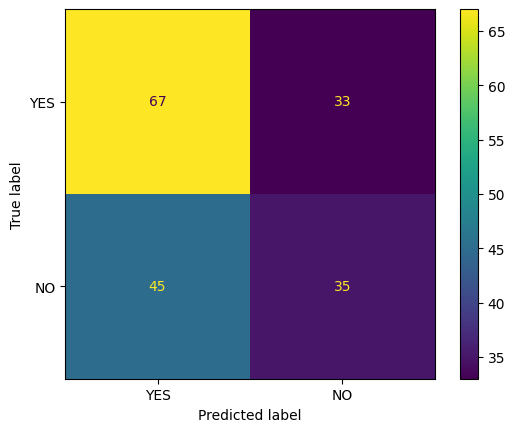

In [30]:
# Create the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
visualized_cm = ConfusionMatrixDisplay(cm, display_labels=["YES", "NO"]).plot()
# Note: The top left are the True Positives,
# The top right are the False Positives,
# The bottom left are the False Negatives,
# The bottom right are the True Negatives.

What I noted:
- parameters and hyperparameters of a machine learning model and their differences
- I tuned the hyperparameters with grid search & random search and saw which one performs better/faster.

Pros:
- efficient and straightforward nature, it doesn't require high computation power, is easy to implement, easily interpretable
- Logistic regression provides a probability score for observations, doesn't require scaling of features.

Cons:
- unable to handle a large number of categorical features/variables.
- Do not perform well with independent variables that are not correlated to the target variable and are very similar or correlated to each other.
- can't solve the non-linear problem with the logistic regression, thus why it requires a transformation of non-linear features.